## Forecasting Apple closing  prices using LSTM

In [1]:
#Importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline
sns.set_style('whitegrid')

In [2]:
#importing apple stock dataset
data=pd.read_csv('applestock.csv')

In [3]:
#checking top 5 variables
data.head()

,Date,Close/Last,Volume,Open,High,Low
0,12/08/2020,$124.38,82225510,$124.37,$124.98,$123.09
1,12/07/2020,$123.75,86711990,$122.31,$124.57,$122.25
2,12/04/2020,$122.25,78260420,$122.6,$122.8608,$121.52
3,12/03/2020,$122.94,78967630,$123.52,$123.78,$122.21
4,12/02/2020,$123.08,89004200,$122.02,$123.37,$120.89


In [4]:
#checking dataset info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2517 entries, 0 to 2516
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Date         2517 non-null   object
 1    Close/Last  2517 non-null   object
 2    Volume      2517 non-null   int64 
 3    Open        2517 non-null   object
 4    High        2517 non-null   object
 5    Low         2517 non-null   object
dtypes: int64(1), object(5)
memory usage: 118.1+ KB


In [5]:
# Renaming the columns
data.rename(columns={' Close/Last':'Close',' Volume':'Volume',' Open':'Open',' High':'High',' Low':'Low'},inplace=True)

In [6]:
data.head()

,Date,Close,Volume,Open,High,Low
0,12/08/2020,$124.38,82225510,$124.37,$124.98,$123.09
1,12/07/2020,$123.75,86711990,$122.31,$124.57,$122.25
2,12/04/2020,$122.25,78260420,$122.6,$122.8608,$121.52
3,12/03/2020,$122.94,78967630,$123.52,$123.78,$122.21
4,12/02/2020,$123.08,89004200,$122.02,$123.37,$120.89


In [7]:
#Removing the DOLLAR SIGN ($) in the variables
data=data.replace({'\$':''}, regex = True)
    

In [8]:
#checking if the $ is removed
data.head()

,Date,Close,Volume,Open,High,Low
0,12/08/2020,124.38,82225510,124.37,124.98,123.09
1,12/07/2020,123.75,86711990,122.31,124.57,122.25
2,12/04/2020,122.25,78260420,122.6,122.8608,121.52
3,12/03/2020,122.94,78967630,123.52,123.78,122.21
4,12/02/2020,123.08,89004200,122.02,123.37,120.89


In [9]:
#changing the datatype in the dataset
data=data.astype({'Close':float,'Open':float, 'High':float, 'Low':float})
data['Date']=pd.to_datetime(data.Date)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2517 entries, 0 to 2516
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    2517 non-null   datetime64[ns]
 1   Close   2517 non-null   float64       
 2   Volume  2517 non-null   int64         
 3   Open    2517 non-null   float64       
 4   High    2517 non-null   float64       
 5   Low     2517 non-null   float64       
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 118.1 KB


Text(0, 0.5, 'Stock Value')

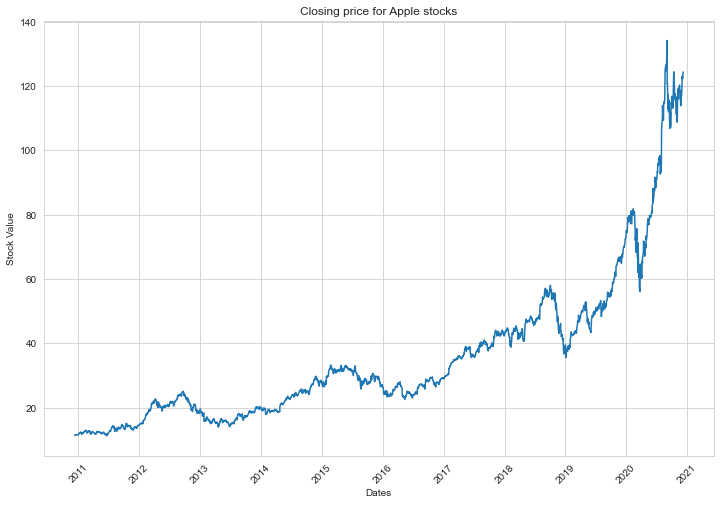

In [11]:
#Plotting the closing value of stocks over 10 years
plt.figure(figsize=(12,8))
plt.plot(data['Date'],data['Close'])
plt.title('Closing price for Apple stocks')
plt.xticks(rotation= 45)
plt.xlabel('Dates')
plt.ylabel('Stock Value')

In [12]:
#checking the shape of the dataset
data.shape

(2517, 6)

In [13]:
#sorting values in ascending order and resetting the index 
data=data.sort_values(by='Date',ascending=True)
data.reset_index(inplace=True,drop=True)

In [14]:
data.head()

,Date,Close,Volume,Open,High,Low
0,2010-12-09,11.4199,293514923,11.5047,11.5179,11.3936
1,2010-12-10,11.4486,262306191,11.4161,11.4661,11.3786
2,2010-12-13,11.4882,438692065,11.5846,11.6093,11.4643
3,2010-12-14,11.4389,350875700,11.4904,11.5193,11.3929
4,2010-12-15,11.4414,415122794,11.4286,11.5357,11.3996


In [15]:
#spliting the dataset into traning and testing
train_data=data[:2000]
test_data=data[2000:]

In [16]:
#checking the dataset for training and testing
train_data.shape, test_data.shape

((2000, 6), (517, 6))

In [17]:
#extracting the Closing value
#Traning dataset
x_train=train_data['Close'].values
x_train=x_train.reshape(-1,1)

#test data
x_test=test_data['Close'].values
x_test=x_test.reshape(-1,1)

In [18]:
x_train.shape, x_test.shape

((2000, 1), (517, 1))

## Feature scaring

In [19]:
#scaling traning data
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0, 1))
scaled_data=scaler.fit_transform(x_train)

In [20]:
scaled_data[0:15]

array([[0.00338993],
       [0.00400376],
       [0.0048507 ],
       [0.0037963 ],
       [0.00384977],
       [0.00452989],
       [0.00404225],
       [0.00526348],
       [0.00678842],
       [0.00751774],
       [0.00632431],
       [0.00714987],
       [0.007753  ],
       [0.00761612],
       [0.00637136]])

In [21]:
# Creating a data structure with 50 timesteps and 1 output
X_train = []
y_train = []
for i in range(50, 2000):
    X_train.append(scaled_data[i-50:i, 0])
    y_train.append(scaled_data[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [22]:
X_train.shape, y_train.shape

((1950, 50), (1950,))

In [23]:
#reshaping the data to 3D for easy consumption by LTSM model
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [24]:
X_train.shape

(1950, 50, 1)

## Building the model 

In [25]:
#import the Necessary libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,LSTM,Dropout

In [26]:
#Creating the model using RELU activation function and dropout regularizer
model=Sequential()
model.add(LSTM(units=50,return_sequences=True,input_shape=(X_train.shape[1], 1),activation='relu'))
model.add(Dropout(0.2))
model.add(LSTM(units = 50, return_sequences = True,activation='relu'))
model.add(Dropout(0.2))
model.add(LSTM(units = 50, return_sequences = True,activation='relu'))
model.add(Dropout(0.2))
model.add(LSTM(units=50,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1))


In [27]:
#Compiling the model using ADAM optimizer and Mean Square Error as loss function
model.compile(optimizer='adam',loss='mse')

In [28]:
#summary of the model
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 50, 50)            10400     
_________________________________________________________________
dropout (Dropout)            (None, 50, 50)            0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 50, 50)            20200     
_________________________________________________________________
dropout_1 (Dropout)          (None, 50, 50)            0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 50, 50)            20200     
_________________________________________________________________
dropout_2 (Dropout)          (None, 50, 50)            0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 50)                2

In [29]:
#Training the model
model.fit(X_train,y_train,epochs=20,verbose=1,batch_size=20)

Epoch 1/20
98/98 [==============================] - 11s 114ms/step - loss: 0.0301
Epoch 2/20
98/98 [==============================] - 11s 113ms/step - loss: 0.0056
Epoch 3/20
98/98 [==============================] - 11s 110ms/step - loss: 0.0047
Epoch 4/20
98/98 [==============================] - 11s 117ms/step - loss: 0.0042
Epoch 5/20
98/98 [==============================] - 11s 116ms/step - loss: 0.0036
Epoch 6/20
98/98 [==============================] - 11s 111ms/step - loss: 0.0038
Epoch 7/20
98/98 [==============================] - 11s 114ms/step - loss: 0.0033
Epoch 8/20
98/98 [==============================] - 11s 112ms/step - loss: 0.0032
Epoch 9/20
98/98 [==============================] - 11s 115ms/step - loss: 0.0038
Epoch 10/20
98/98 [==============================] - 11s 113ms/step - loss: 0.0026
Epoch 11/20
98/98 [==============================] - 11s 113ms/step - loss: 0.0027
Epoch 12/20
98/98 [==============================] - 11s 115ms/step - loss: 0.0024
Epoch 13/20
9

In [30]:
X_test = []
y_test = []
for i in range(50, 517):
    X_test.append(scaled_data[i-50:i, 0])
    y_test.append(scaled_data[i, 0])
X_test, y_test = np.array(X_test), np.array(y_test)

In [31]:
X_test.shape, y_test.shape

((467, 50), (467,))

In [32]:
#reshaping the data to 3D for easy consumption by LTSM model
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [33]:
#predicted data
pred_data=model.predict(X_test)
#before predicting, use inverse_transform() in the predictions array, because we make predictions using the Scale, so predictions are between 0 and 1.
pred_data=scaler.inverse_transform(pred_data)
#pred_data.shape

In [34]:
#use inverse_tranform 
y_test=scaler.inverse_transform(y_test.reshape(-1,1))

In [35]:
y_test.shape, y_test[0:10]

((467, 1),
 array([[12.0932],
        [12.2364],
        [12.2457],
        [12.4343],
        [12.6146],
        [12.4754],
        [12.5757],
        [12.8414],
        [12.8571],
        [12.6914]]))

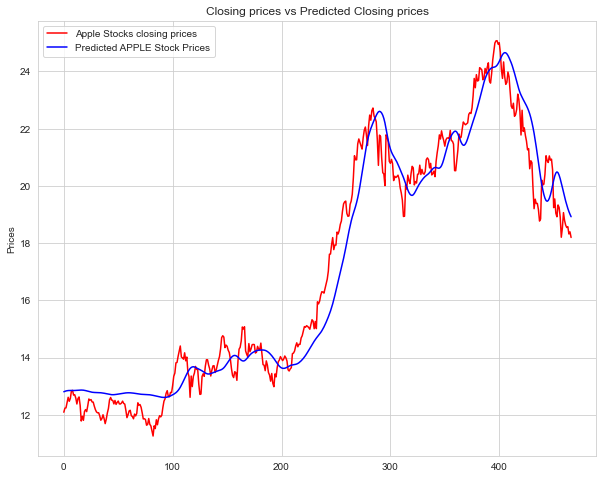

In [36]:
#comparing the real values and predicted values 
plt.figure(figsize=(10,8))
plt.plot(y_test, color = 'red', label = 'Apple Stocks closing prices')
plt.plot(pred_data, color = 'blue', label = 'Predicted APPLE Stock Prices')
plt.title('Closing prices vs Predicted Closing prices')
plt.ylabel('Prices')
plt.legend()